In [1]:
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Download Data

In [2]:
os.makedirs("datasets", exist_ok=True)

In [3]:
#!/bin/bash
!kaggle datasets download -d urvishahir/global-freelancers-raw-dataset -p datasets/

Dataset URL: https://www.kaggle.com/datasets/urvishahir/global-freelancers-raw-dataset


  0%|          | 0.00/22.1k [00:00<?, ?B/s]
100%|██████████| 22.1k/22.1k [00:00<00:00, 3.75MB/s]



License(s): CC0-1.0



In [4]:
# Ekstrak file zip
with zipfile.ZipFile("datasets/global-freelancers-raw-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/global-freelance")

## 1. Mendeskripsikan Data

In [5]:
df = pd.read_csv('datasets/global-freelance/global_freelancers_raw.csv')

In [6]:
print("Jumlah data (baris, kolom):", df.shape)

Jumlah data (baris, kolom): (1000, 12)


In [7]:
print("Informasi tipe data dan skema pengkodean:")
print(df.info())

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB
None


In [8]:
print("\nStatistik deskriptif untuk data numerik:")
print(df.describe())


Statistik deskriptif untuk data numerik:
              age  years_of_experience      rating
count  970.000000           949.000000  899.000000
mean    40.509278            11.340358    2.512570
std     11.942605             9.680610    1.546599
min     20.000000             0.000000    0.000000
25%     31.000000             3.000000    1.400000
50%     41.000000             9.000000    2.600000
75%     51.000000            17.000000    3.800000
max     60.000000            41.000000    5.000000


In [9]:
print("Beberapa baris pertama data:")
df.head()

Beberapa baris pertama data:


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [11]:
print("Jumlah nilai unik untuk setiap kolom:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Jumlah nilai unik untuk setiap kolom:
freelancer_ID: 1000
name: 992
gender: 10
age: 41
country: 21
language: 16
primary_skill: 10
years_of_experience: 41
hourly_rate (USD): 18
rating: 42
is_active: 8
client_satisfaction: 81


## 2. Eksplorasi Data

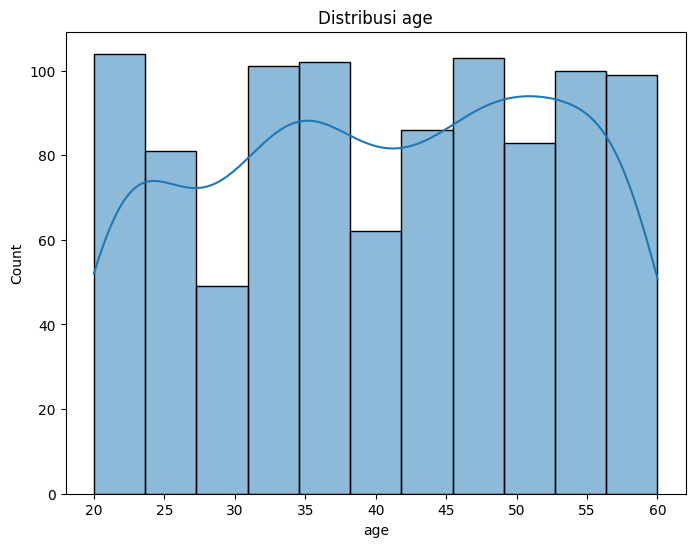

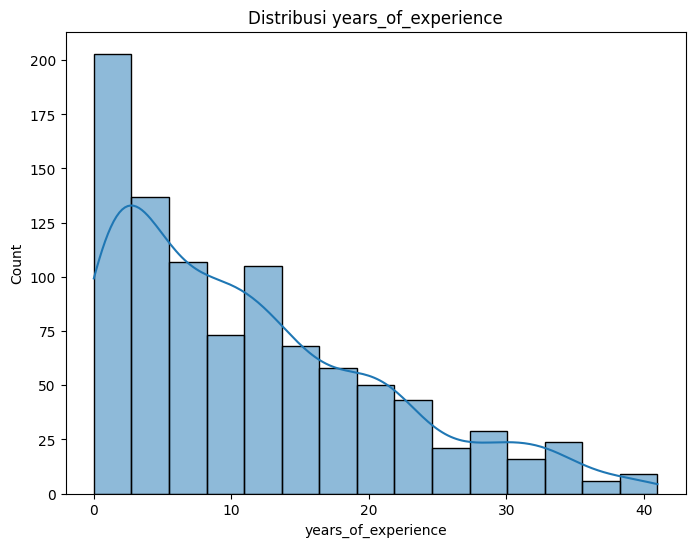

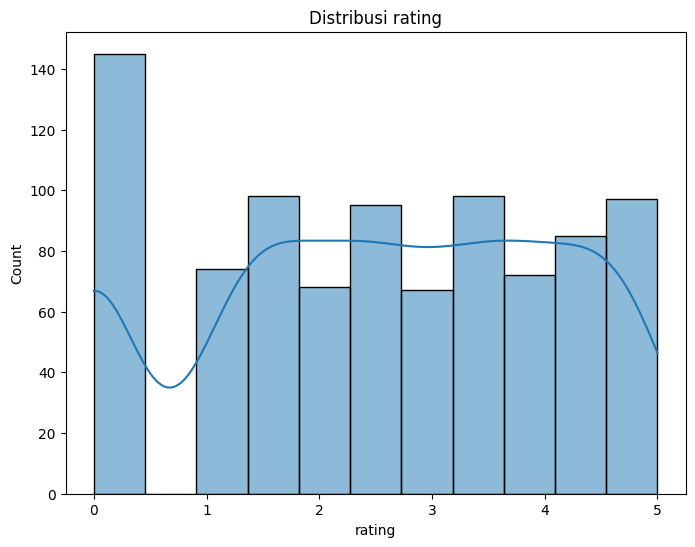

In [12]:
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

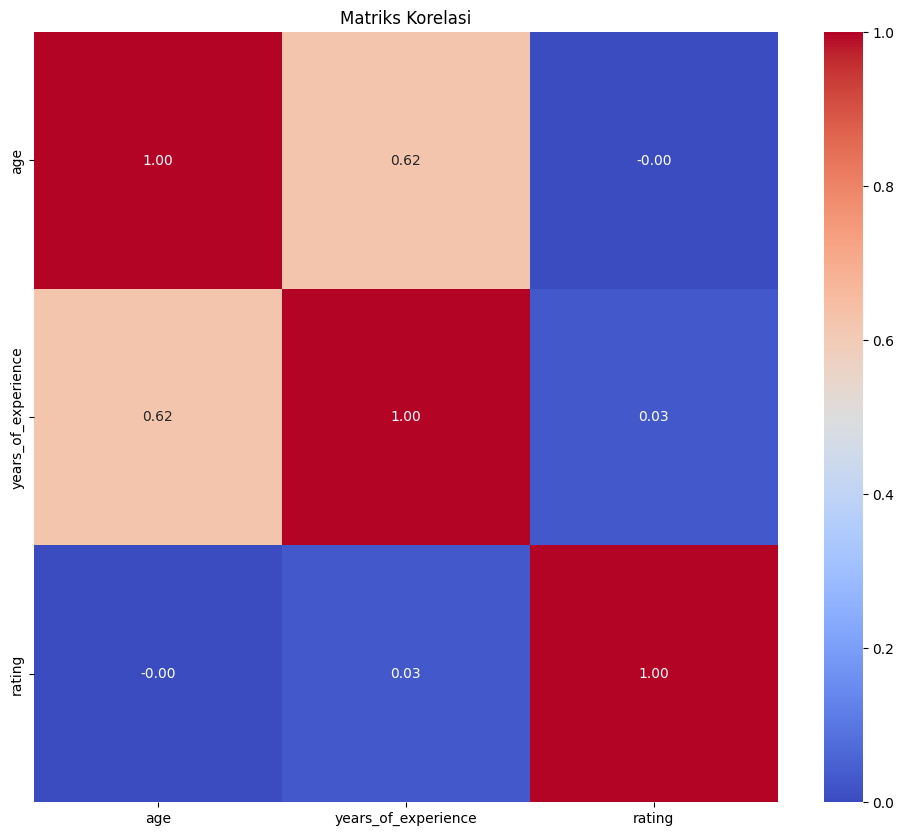

In [14]:
correlation_matrix = df.select_dtypes('number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


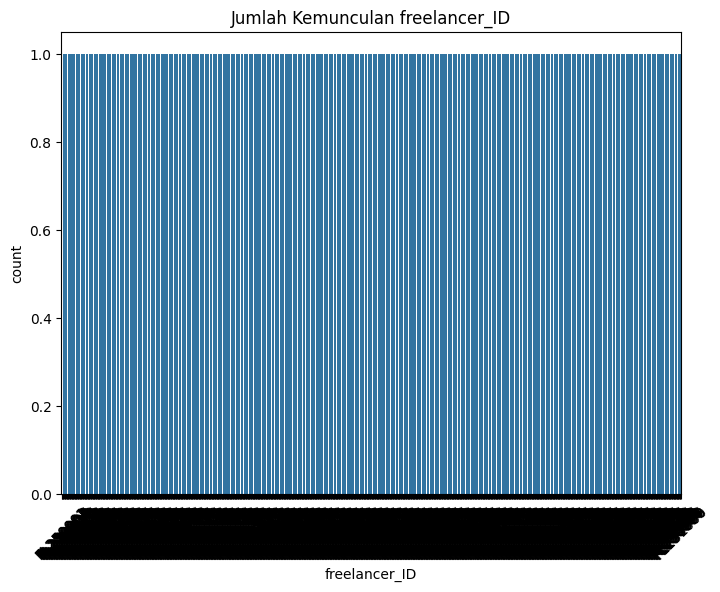

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


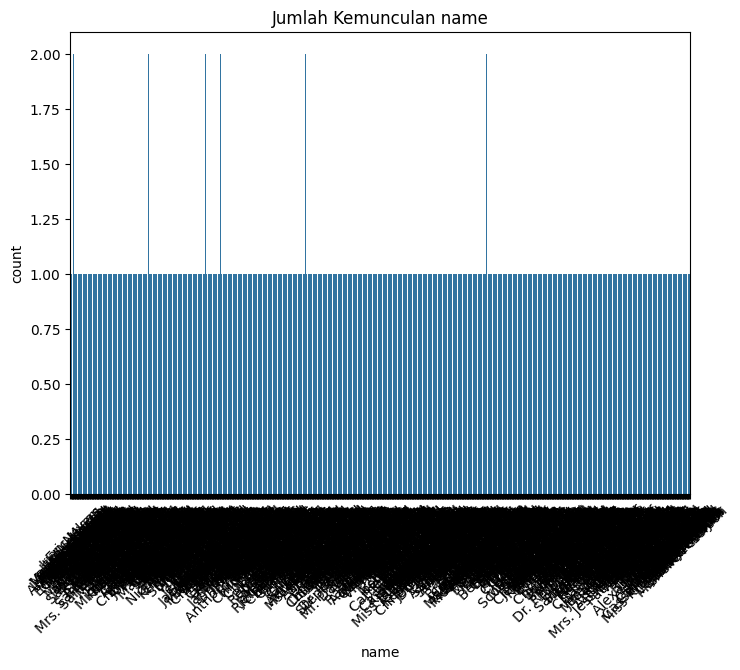

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


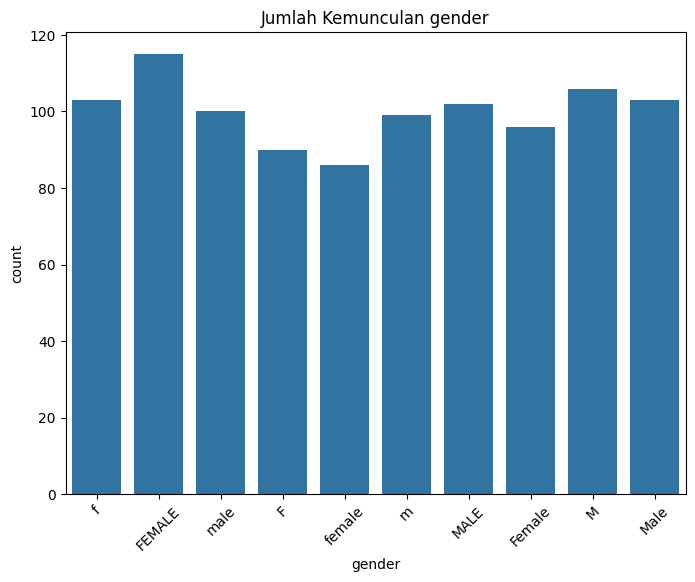

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


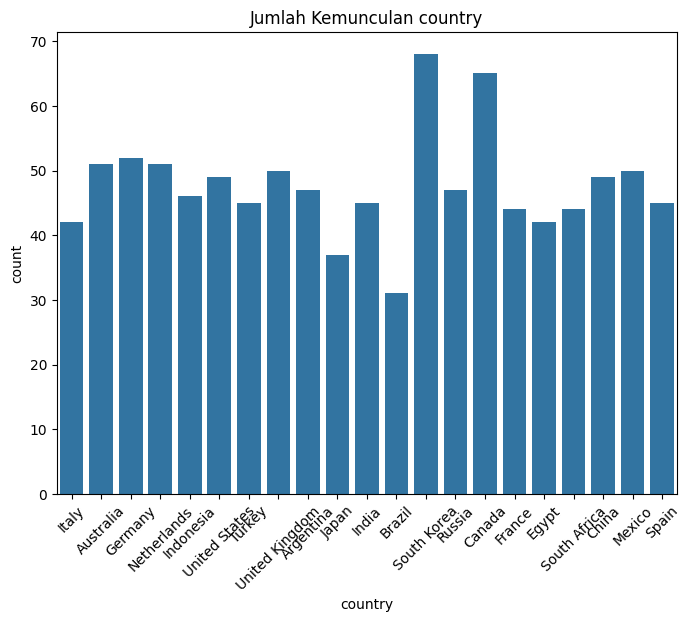

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


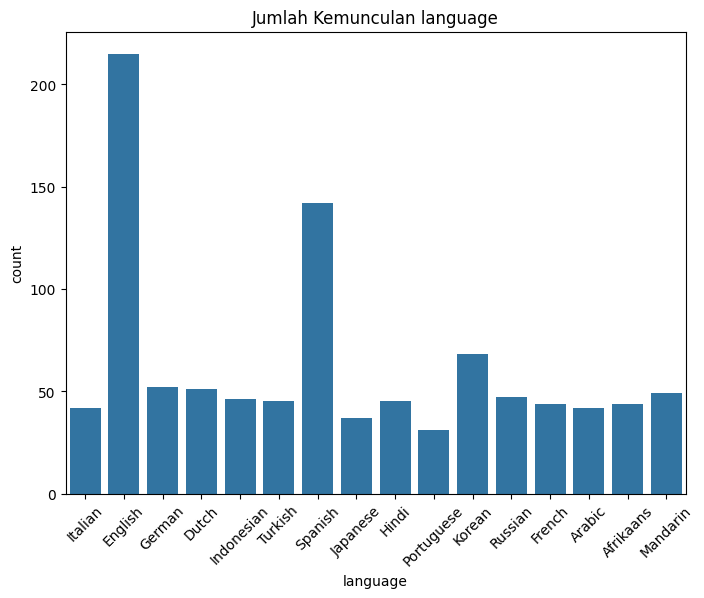

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


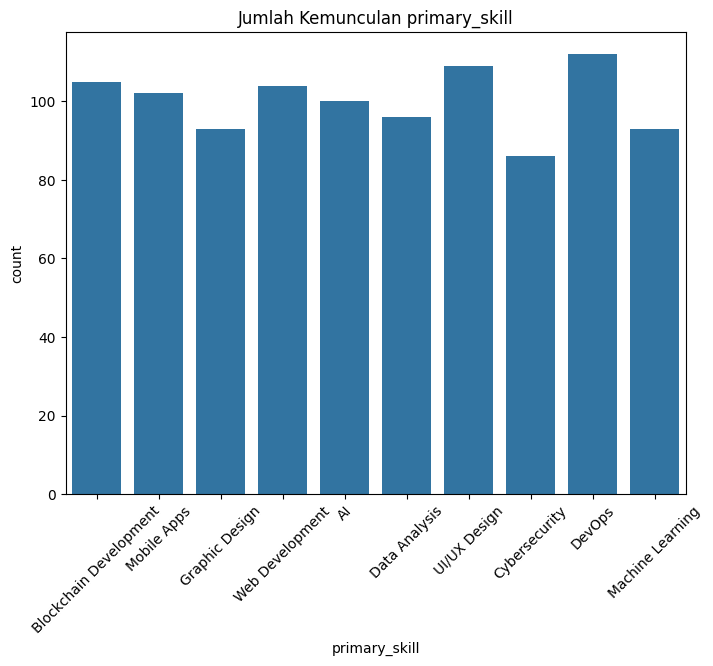

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


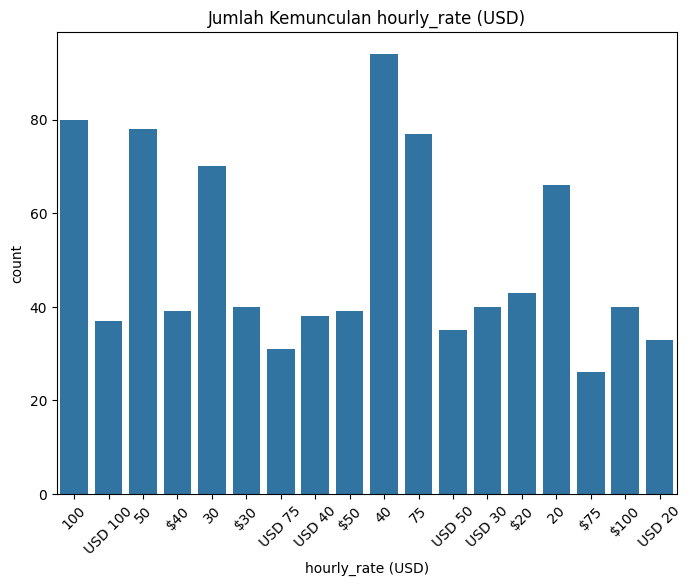

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


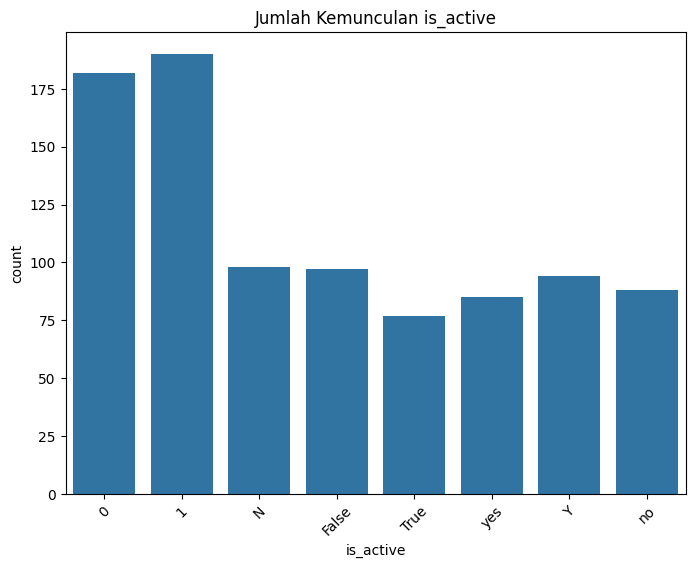

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


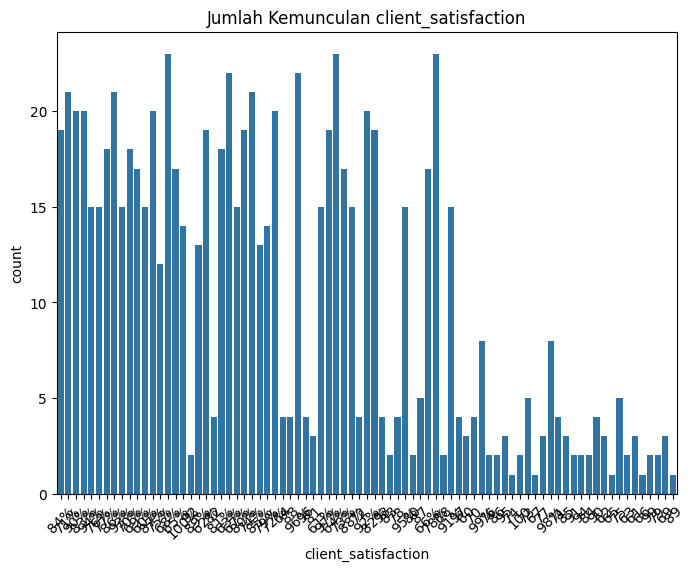

In [16]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Jumlah Kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [17]:
missing_values = df.isnull().sum()
print("Jumlah Nilai Hilang Setiap Kolom:")
print(missing_values)

Jumlah Nilai Hilang Setiap Kolom:
freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


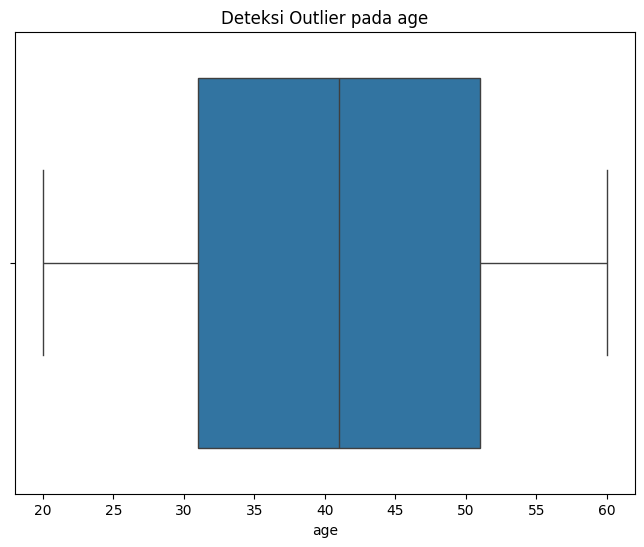

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


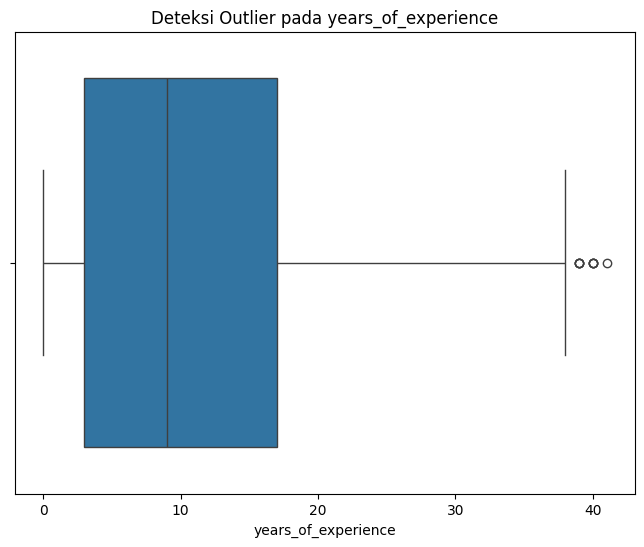

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


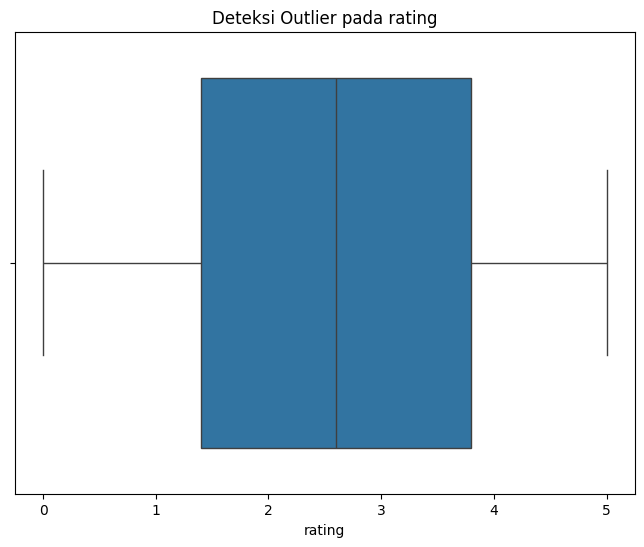

In [18]:
# Analisis Outlier
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()

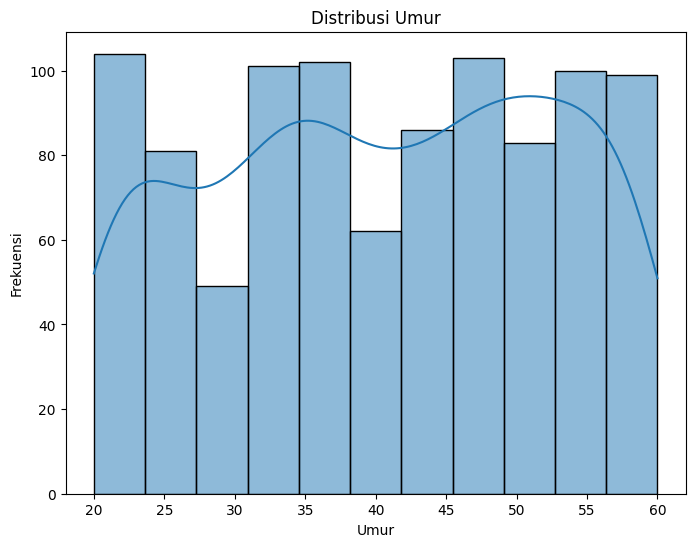

In [19]:
# Menampilkan distribusi data untuk kolom tertentu
# (misalnya, 'Umur')
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

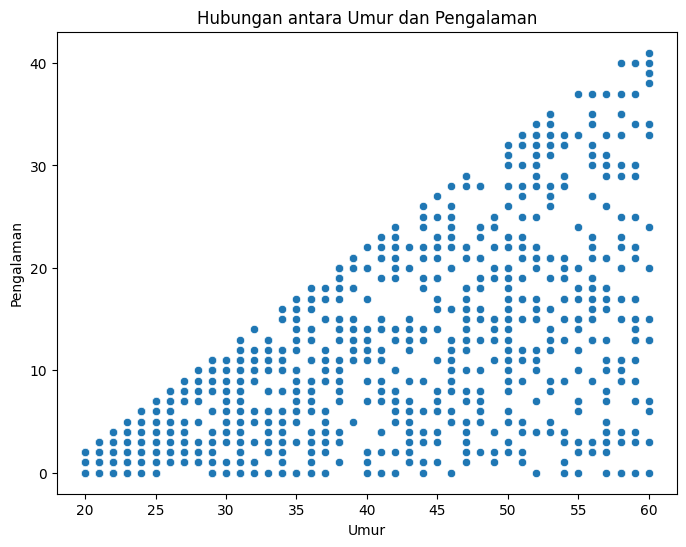

In [21]:
# Analisis hubungan antara dua variabel (misalnya, 'Umur' dan 'Pengalaman')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='years_of_experience', data=df)
plt.title('Hubungan antara Umur dan Pengalaman')
plt.xlabel('Umur')
plt.ylabel('Pengalaman')
plt.show()


## 3. Verifikasi Kualitas Data

In [22]:
# Validasi kolom numerik
print('Validasi kolom numerik:')
for i in numerical_features:
    if df[i].min() < 0:
        print(f'Terdapat nilai {i} negatif, perlu diperiksa lebih lanjut')
    else:
        print(f"Nilai {i} valid")

Validasi kolom numerik:
Nilai age valid
Nilai years_of_experience valid
Nilai rating valid


In [25]:
print("Validasi Jenis Kelamin:")
invalid_gender = df['gender'].apply(lambda x: x not in ['male', 'female']).sum()
if invalid_gender > 0:
    print(f"Terdapat {invalid_gender} nilai jenis kelamin yang tidak valid.")
else:
    print("Nilai jenis kelamin valid.")

Validasi Jenis Kelamin:
Terdapat 814 nilai jenis kelamin yang tidak valid.


In [27]:
print('Validasi Data Duplikat:')
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Terdapat {duplicate_rows} baris data duplikat.")
    data = df.drop_duplicates()  # Hapus baris duplikat jika dirasa perlu
else:
    print("Tidak ada baris data duplikat.")

Validasi Data Duplikat:
Tidak ada baris data duplikat.
